In [1]:
import os
import pandas as pd
import json
import seaborn as sns

In [2]:
input_path_train = os.path.join('..', 'data science part dataset', 'dataset', 'training_data', 'annotations')
input_path_test = os.path.join('..', 'data science part dataset', 'dataset', 'testing_data', 'annotations')

In [3]:
def load_data_to_df(input_path):
    
    df_data = pd.DataFrame(columns=['form', 'id', 'text', 'box_0', 'box_1',
                                    'box_2', 'box_3', 'label'])

    for file_path in os.listdir(input_path):
        
        input_file_path = os.path.join(input_path, file_path)
        json_df = pd.read_json(input_file_path)
        json_form = json.loads(json_df.to_json())['form']

        for text_id in json_form:

            box_0 = json_form[str(text_id)]['box'][0]
            box_1 = json_form[str(text_id)]['box'][1]
            box_2 = json_form[str(text_id)]['box'][2]
            box_3 = json_form[str(text_id)]['box'][3]
            
            text = json_form[str(text_id)]['text']
            label = json_form[str(text_id)]['label']

            df_new_row = pd.DataFrame({'form': [input_file_path],
                                       'id': [text_id],
                                       'box_0': [box_0],
                                       'box_1': [box_1],
                                       'box_2': [box_2],
                                       'box_3': [box_3],
                                       'text': [text],
                                       'label': [label]})

            df_data = pd.concat([df_data, df_new_row])
    
    df_data = df_data.reset_index(drop=True)
    
    for col in ['box_0', 'box_1', 'box_2', 'box_3']:
        df_data[col] = pd.to_numeric(df_data[col])
    
    
    
    return df_data

In [4]:
# df_data = pd.DataFrame(columns=['form', 'id', 'text', 'box_0', 'box_1',
#                                     'box_2', 'box_3', 'label'])

# input_file_path = os.path.join('.', 'smpl.json')
# json_df = pd.read_json(input_file_path)
# json_form = json.loads(json_df.to_json())['form']

# for text_id in json_form:

#     box_0 = json_form[str(text_id)]['box'][0].astype('int32')
#     box_1 = json_form[str(text_id)]['box'][1].astype('int32')
#     box_2 = json_form[str(text_id)]['box'][2].astype('int32')
#     box_3 = json_form[str(text_id)]['box'][3].astype('int32')

#     text = json_form[str(text_id)]['text']
#     label = json_form[str(text_id)]['label']

#     df_new_row = pd.DataFrame({'form': [input_file_path],
#                                'id': [text_id],
#                                'box_0': [box_0],
#                                'box_1': [box_1],
#                                'box_2': [box_2],
#                                'box_3': [box_3],
#                                'text': [text],
#                                'label': [label]})

#     df_data = pd.concat([df_data, df_new_row])

#### Load training data

In [5]:
df_train = load_data_to_df(input_path_train)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7411 entries, 0 to 7410
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   form    7411 non-null   object
 1   id      7411 non-null   object
 2   text    7411 non-null   object
 3   box_0   7411 non-null   int64 
 4   box_1   7411 non-null   int64 
 5   box_2   7411 non-null   int64 
 6   box_3   7411 non-null   int64 
 7   label   7411 non-null   object
dtypes: int64(4), object(4)
memory usage: 463.3+ KB


In [7]:
df_train.to_csv('df_train.csv')  

#### Load testing data

In [8]:
df_test = load_data_to_df(input_path_test)

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   form    2332 non-null   object
 1   id      2332 non-null   object
 2   text    2332 non-null   object
 3   box_0   2332 non-null   int64 
 4   box_1   2332 non-null   int64 
 5   box_2   2332 non-null   int64 
 6   box_3   2332 non-null   int64 
 7   label   2332 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.9+ KB


In [10]:
df_test.to_csv('df_test.csv') 

In [11]:
help(sns.categorical.barplot)

Help on function barplot in module seaborn.categorical:

barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x0000016B8FBD3EE0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    va

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7411 entries, 0 to 7410
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   form    7411 non-null   object
 1   id      7411 non-null   object
 2   text    7411 non-null   object
 3   box_0   7411 non-null   int64 
 4   box_1   7411 non-null   int64 
 5   box_2   7411 non-null   int64 
 6   box_3   7411 non-null   int64 
 7   label   7411 non-null   object
dtypes: int64(4), object(4)
memory usage: 463.3+ KB


C:\Users\jpicao\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

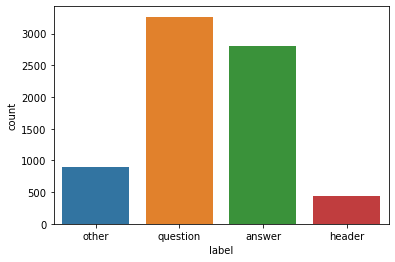

In [13]:
sns.categorical.countplot(df_train['label'])